# Projection Plots of Njets2p5 on 2 (feature) dimensions 

-) the most relevant functions are called from effPlotwidget.py

### Instructions:
execute a cell with shift+enter :-)

#### suggestions for improvement
-) The binnning for pt-type variables and rapidity-type variables is fixed. It could be customized using the widgets

-) When performing a (detector) effieciency plot the mass reconstruction type as well as the number of jets are irrelevant. Nevertheless, the buttons are still enabled

-) Could improve a lot the visiual appearance of the widgets (design)

-) Plot design - units, overlapping tickmarks, scientific notation, axis labels...

In [1]:
from ipywidgets import interact, fixed, interactive, widgets, interact_manual
from IPython.display import display, clear_output

import matplotlib.pyplot as plt
plt.style.use('seaborn-poster')
%matplotlib inline

import effPlotwidget as effplt
reload(effplt)
effplt.defaultWidgets()

Welcome to ROOTaaS 6.06/08


#### specify the directory where the classifier is stored

In [2]:
w = interactive(effplt.GetDictionary,inputDir=effplt.widgetparams['w_inputDir'])
display(w)

classifiers found


({u'Train_Configurable_Refactor_higgs_model_dep_1702482': u'Train_Configurable_Refactor_higgs_model_dep_1702482',
  u'Train_Configurable_Refactor_higgs_model_dep_1735132': u'Train_Configurable_Refactor_higgs_model_dep_1735132',
  u'effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out': u'effGenVarClassBinnedRecoPtBinnedRecoNjets2p5_out',
  u'effGenVarClassBinnedRecoPt_out': u'effGenVarClassBinnedRecoPt_out',
  u'effGenVarClass_binnedPtNjets_out': u'effGenVarClass_binnedPtNjets_out',
  u'effGenVarClass_binnedRecoPt_out': u'effGenVarClass_binnedRecoPt_out',
  u'fullBDT': u'fullBDT'},
 u'./classifiers')

#### specify the directory where the data (root trees) is stored. Afterwards you can choose from a Dropdown among the classifiers which are available in the directory you chose in the previous cell

Note: Since it takes some time to load the classifier you need to tick the Checkbox "Load classifier" in order to launch the loading process.

In [3]:
#extract the dictionary with the classifier names found in the
#given directory plus the directory name
class_dict = w.result[0]
inDir = w.result[1]

fitterObject = interactive(effplt.GetFitter,
                           inputName=class_dict,
                            dataDir =effplt.widgetparams['w_dataDir'],
                            inputDir=fixed(inDir),
                            load = effplt.widgetparams['w_Load']
                          )

display(fitterObject)

entered config files named my_train_config
None
Load object with the name fullBDT and the following paramters 
./classifiers
./classifiers/fullBDT.pkl.gz
loading pickle ./classifiers/fullBDT.pkl.gz
loading data ./classifiers/fullBDT.root
Index([u'absweight', u'class', u'genJet2p5Pt0', u'genJet2p5Pt1',
       u'genJet2p5Pt2', u'genJet2p5Pt3', u'genJet2p5Rapidity0',
       u'genJet2p5Rapidity1', u'genJet2p5Rapidity2', u'genJet2p5Rapidity3',
       u'genNjets2p5', u'genPt', u'genRapidity', u'recoNjets2p5', u'recoPt',
       u'recoRapidity', u'weight', u'proc', u'absGenRapidity',
       u'absGenJet2p5Rapidity0', u'absGenJet2p5Rapidity1',
       u'absGenJet2p5Rapidity2', u'absGenJet2p5Rapidity3', u'recoPtBin',
       u'recoPtCat', u'recoNjets2p5Bin', u'recoNjets2p5Cat', u'class_prob_0',
       u'class_prob_1', u'class_prob_2', u'class_prob_3', u'recoPtCat_prob_0',
       u'recoPtCat_prob_1', u'recoPtCat_prob_2', u'recoPtCat_prob_3',
       u'recoPtCat_prob_4', u'recoPtCat_prob_5', u'recoPtC

#### Look at the desired projection plot

Specifiy the x- and y-axis of the projection. You need to specify either which di-photon mass resolution category and the number of jets or whether to plot the total efficiency.

Press the button "Run NjetsEffPlots" to see the plots with your settings.

2


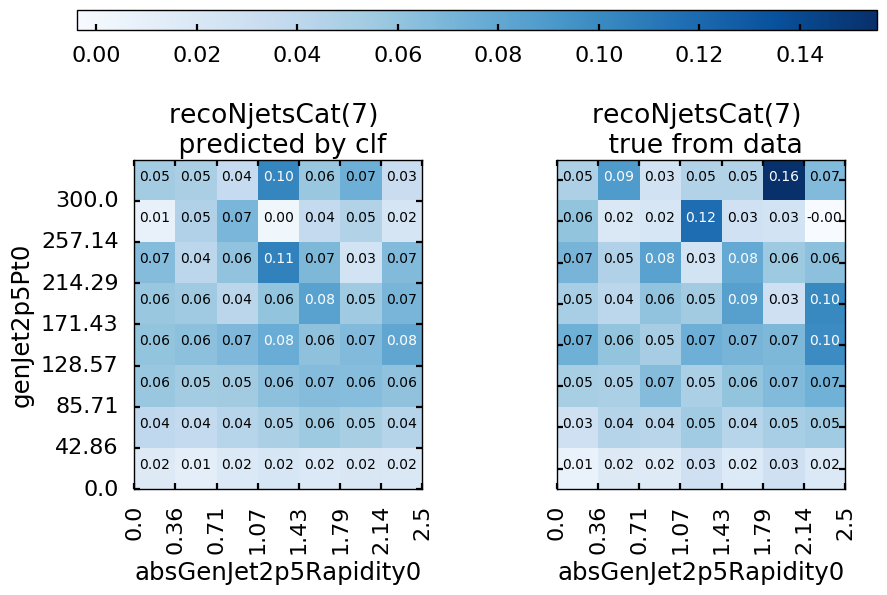

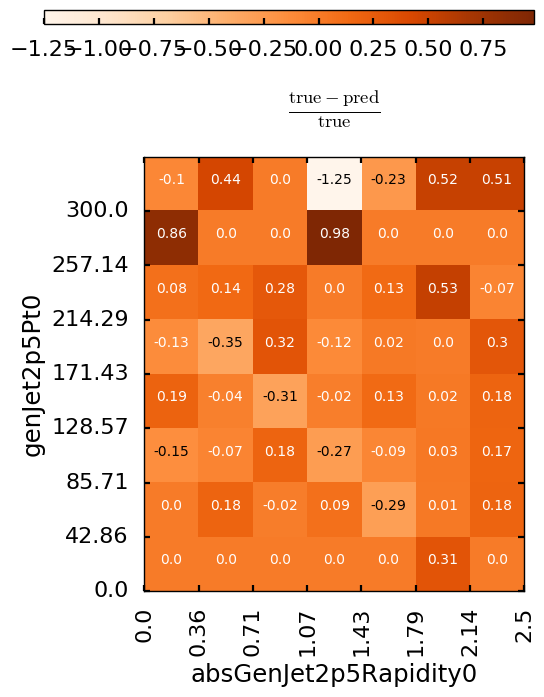

In [4]:
interact_manual(effplt.NjetsEffPlots,effFitter=fixed(fitterObject.result),
                x_var=effplt.widgetparams['w_varName_x'],
                y_var=effplt.widgetparams['w_varName_y'],
                prodProc=effplt.widgetparams['w_prodProc'],
                m_gamma_cat=effplt.widgetparams['w_mres_cat'], 
                Njets=effplt.widgetparams['w_noJets'], 
                effTag=effplt.widgetparams['w_detector_eff'])


In [5]:
w_pt_boundaries = widgets.FloatRangeSlider(
    value=[20., 250.],
    min=0.,
    max=300.0,
    step=10,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i',
    slider_color='white',
    color='blue'
)

w_Rapidity_boundaries = widgets.FloatRangeSlider(
    value=[0., 2.],
    min=0.,
    max=2.6,
    step=0.1,
    description='Test:',
    disabled=False,
    continuous_update=False,
    orientation='horizontal',
    readout=True,
    readout_format='i',
    slider_color='white',
    color='blue'
)

w_Npt_bins = widgets.BoundedIntText(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Number of pt bins:',
    disabled=False
)

w_NRapidity_bins = widgets.BoundedIntText(
    value=7,
    min=0,
    max=10,
    step=1,
    description='Number of Rapidity bins:',
    disabled=False
)

w_includeOwerflow = widgets.Checkbox(
    value=False,
    description='include overflow',
    disabled=False
)


In [6]:
w_pt_boundaries

In [7]:
w_Rapidity_boundaries


In [8]:
w_NRapidity_bins

In [9]:
w_includeOwerflow



In [5]:
df = fitterObject.result.df

In [19]:
df[df['proc']==3].count()

absweight                  135354
class                      135354
genJet2p5Pt0               135354
genJet2p5Pt1               135354
genJet2p5Pt2               135354
genJet2p5Pt3               135354
genJet2p5Rapidity0         135354
genJet2p5Rapidity1         135354
genJet2p5Rapidity2         135354
genJet2p5Rapidity3         135354
genNjets2p5                135354
genPt                      135354
genRapidity                135354
recoNjets2p5                77792
recoPt                      77792
recoRapidity                77792
weight                     135354
proc                       135354
absGenRapidity             135354
absGenJet2p5Rapidity0      135354
absGenJet2p5Rapidity1      135354
absGenJet2p5Rapidity2      135354
absGenJet2p5Rapidity3      135354
recoPtBin                   77792
recoPtCat                  135354
recoNjets2p5Bin             77792
recoNjets2p5Cat            135354
class_prob_0               135354
class_prob_1               135354
class_prob_2  